## (B-b) vs (B-V)

Minimum errors in B_b_err: 0.0039960596392304
Minimum errors in B_V_err: 0.004
Beta: [ 0.15598649 26.90665742]
Beta Std Error: [0.07580839 0.13556698]
Beta Covariance: [[ 1.91871938e-05 -3.22376713e-05]
 [-3.22376713e-05  6.13599077e-05]]
Residual Variance: 299.518133707029
Inverse Condition #: 0.010987710110459492
Reason(s) for Halting:
  Sum of squares convergence


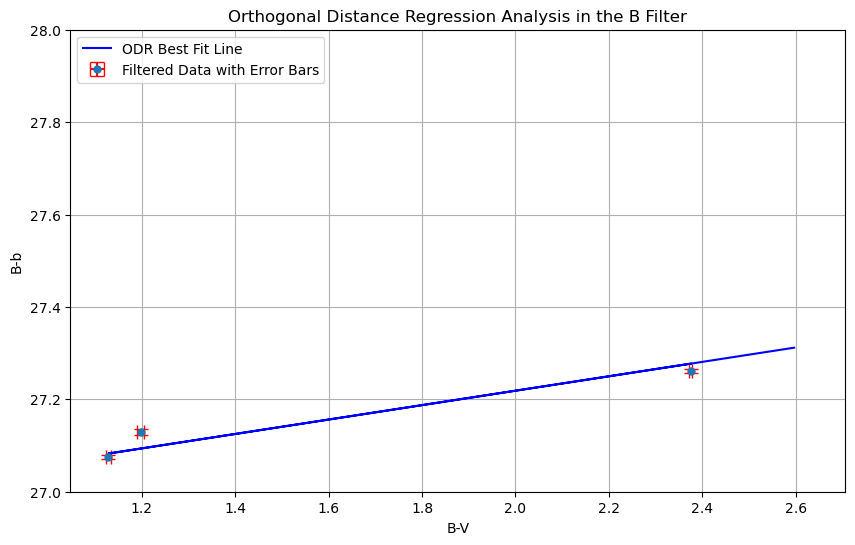

In [6]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/BResult_2.391752113.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/VResult_2.35944558709.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate B-b and B-V
merged_data['B_b'] = merged_data['Known_B'] - merged_data['Instrumental_B']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']


# Filter data
threshold_bv = 0.8
threshold_bb = 26.0
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['B_b'] > threshold_bb)].copy()

# Error propagation
filtered_data['B_b_err'] = filtered_data['KnownB_err'] + filtered_data['InstrumentalB_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in B_b_err:", filtered_data['B_b_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['B_b']
x_err = filtered_data['B_V_err']
y_err = filtered_data['B_b_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('B-b')
plt.title('Orthogonal Distance Regression Analysis in the B Filter')
plt.ylim(27, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()



## (V–v) vs (B–V)

Minimum errors in V_v_err: 0.0015115519507325
Minimum errors in B_V_err: 0.004
Beta: [ 0.36149261 27.44165812]
Beta Std Error: [0.45820613 0.93397703]
Beta Covariance: [[ 1.29642746e-05 -2.57286110e-05]
 [-2.57286110e-05  5.38640282e-05]]
Residual Variance: 16194.724395657486
Inverse Condition #: 0.006185969181491801
Reason(s) for Halting:
  Sum of squares convergence


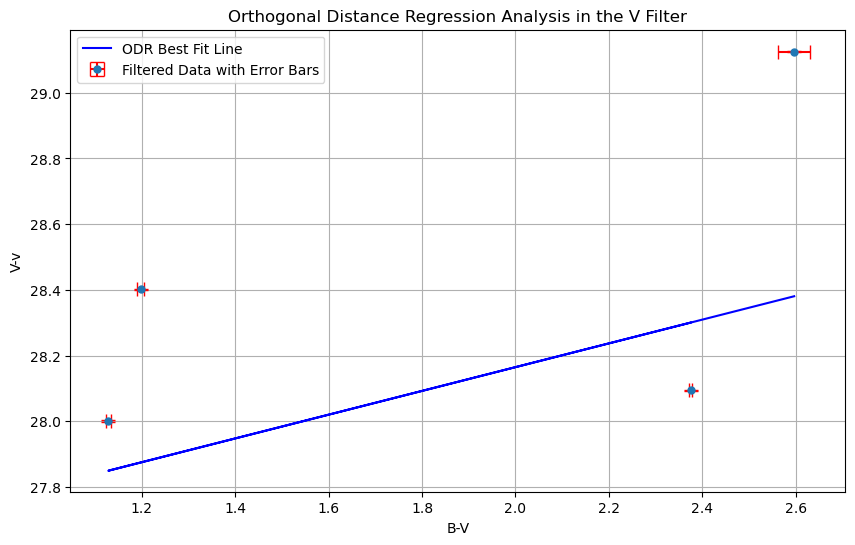

In [7]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/BResult_2.391752113.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/VResult_2.35944558709.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate V-v and B-V
merged_data['V_v'] = merged_data['Known_V'] - merged_data['Instrumental_V']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']

# Filter data
threshold_bv = 0.0  # Adjust threshold for B-V if needed
threshold_vv = 0.0  # Threshold for V-v values, adjust as needed
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['V_v'] > threshold_vv)].copy()

# Error propagation
filtered_data['V_v_err'] = filtered_data['KnownV_err'] + filtered_data['InstrumentalV_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in V_v_err:", filtered_data['V_v_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['V_v']
x_err = filtered_data['B_V_err']
y_err = filtered_data['V_v_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('V-v')
plt.title('Orthogonal Distance Regression Analysis in the V Filter')
plt.legend()
plt.grid(True)
plt.show()


## (R–r) vs (V–R)

Minimum errors in R_r_err: 0.001597590122766
Minimum errors in V_R_err: 0.002
Beta: [-1.2413374  27.78464231]
Beta Std Error: [0.3297682  0.43070716]
Beta Covariance: [[ 0.00011707 -0.00015039]
 [-0.00015039  0.0001997 ]]
Residual Variance: 928.937348670905
Inverse Condition #: 0.008840922301904187
Reason(s) for Halting:
  Sum of squares convergence


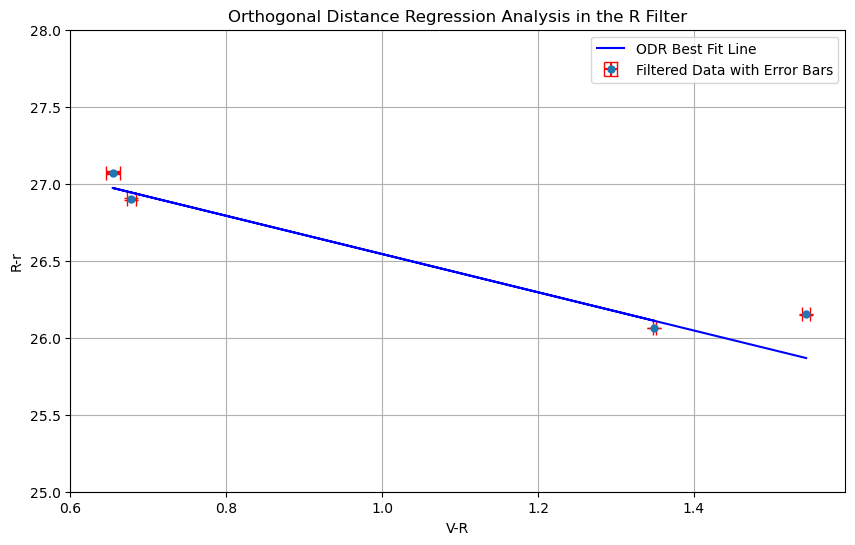

In [8]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_r = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/RResult_2.4236963029.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/VResult_2.35944558709.csv").dropna()


# Merge R and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_r, df_v, on=['RA', 'DEC'], suffixes=('_r', '_v'))

# Calculate R-r and V-R
merged_data['R_r'] = merged_data['Known_R'] - merged_data['Instrumental_R']
merged_data['V_R'] = merged_data['Known_V'] - merged_data['Known_R']

# Filter data
threshold_vr = 0.0 # Adjust threshold for V-R if needed
threshold_rr = 0.0  # Threshold for R-r values, adjust as needed
filtered_data = merged_data[(merged_data['V_R'] > threshold_vr) & (merged_data['R_r'] > threshold_rr)].copy()

# Error propagation
filtered_data['R_r_err'] = filtered_data['KnownR_err'] + filtered_data['InstrumentalR_err']
filtered_data['V_R_err'] = filtered_data['KnownV_err'] + filtered_data['KnownR_err']

# Check if any error terms are too small
print("Minimum errors in R_r_err:", filtered_data['R_r_err'].min())
print("Minimum errors in V_R_err:", filtered_data['V_R_err'].min())

# Preparing ODR
x = filtered_data['V_R']
y = filtered_data['R_r']
x_err = filtered_data['V_R_err']
y_err = filtered_data['R_r_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-R')
plt.ylabel('R-r')
plt.title('Orthogonal Distance Regression Analysis in the R Filter')
plt.ylim(25, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()


## (I–i) vs (V–I)

Minimum errors in I_i_err: 0.0015594881047808
Minimum errors in V_i_err: 0.002
Beta: [-2.45088506 31.94339448]
Beta Std Error: [ 4.05149245 10.35203855]
Beta Covariance: [[ 0.00104405 -0.00266346]
 [-0.00266346  0.0068162 ]]
Residual Variance: 15722.057637072063
Inverse Condition #: 0.0013302000535523881
Reason(s) for Halting:
  Sum of squares convergence


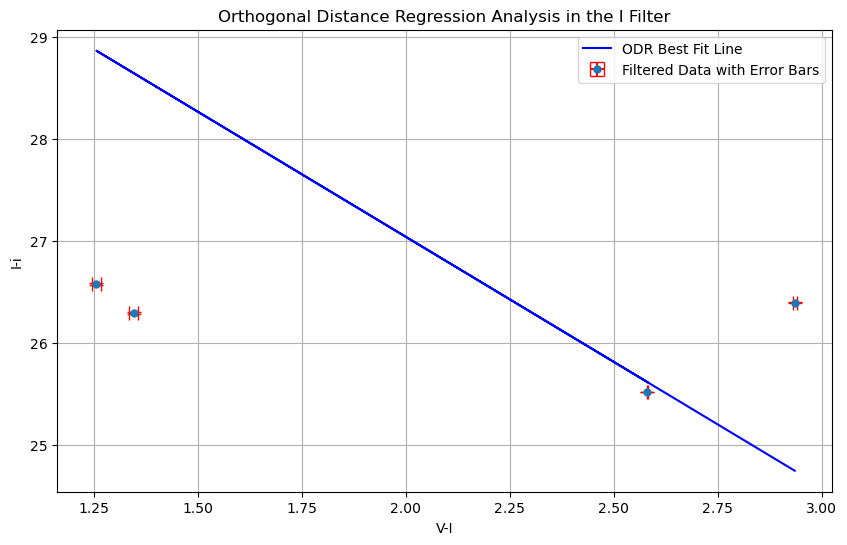

In [9]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_i = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/IResult_2.45572372756.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 2.392 Airmass/VResult_2.35944558709.csv").dropna()

# Merge I and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_i, df_v, on=['RA', 'DEC'], suffixes=('_i', '_v'))

# Calculate I-i and V-i
merged_data['I_i'] = merged_data['Known_I'] - merged_data['Instrumental_I']
merged_data['V_i'] = merged_data['Known_V'] - merged_data['Known_I']

# Filter data
threshold_vi = 0.75  # Adjust threshold for V-i if needed
threshold_ii = 25.0  # Threshold for I-i values, adjust as needed
filtered_data = merged_data[(merged_data['V_i'] > threshold_vi) & (merged_data['I_i'] > threshold_ii)].copy()

# Error propagation
filtered_data['I_i_err'] = filtered_data['KnownI_err'] + filtered_data['InstrumentalI_err']
filtered_data['V_i_err'] = filtered_data['KnownV_err'] + filtered_data['KnownI_err']

# Check if any error terms are too small
print("Minimum errors in I_i_err:", filtered_data['I_i_err'].min())
print("Minimum errors in V_i_err:", filtered_data['V_i_err'].min())

# Preparing ODR
x = filtered_data['V_i']
y = filtered_data['I_i']
x_err = filtered_data['V_i_err']
y_err = filtered_data['I_i_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-I')
plt.ylabel('I-i')
plt.title('Orthogonal Distance Regression Analysis in the I Filter')
plt.legend()
plt.grid(True)
plt.show()
